In [21]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import imutils
import pytesseract
from PIL import Image
import easyocr
import os
import pandas as pd

In [23]:
from pdf2image import convert_from_path

poppler_path = r"poppler-23.11.0\Library\bin"

pages = convert_from_path('086769423320231113174937003717.pdf',500,poppler_path=poppler_path)

for i, image in enumerate(pages):
    fname = 'image'+str(i)+'.png'
    image.save(fname, "PNG")

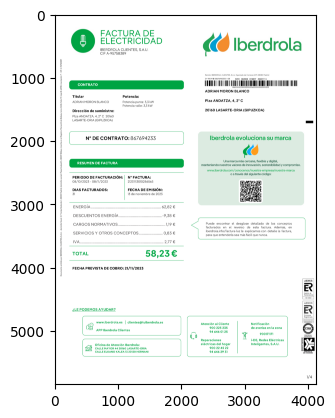

In [25]:
# Leemos la imagen
img = cv.imread('image0.png')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)

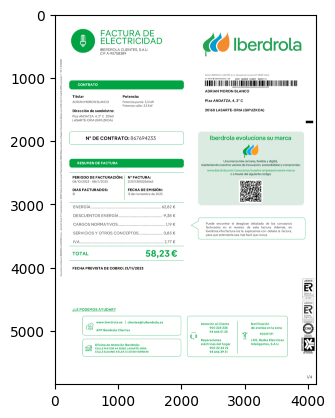

In [26]:
gray = cv.bilateralFilter(img, 11, 17, 17)
plt.imshow(gray, cmap='gray')

In [27]:
reader = easyocr.Reader(['es'])
result = reader.readtext(gray)
result

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

[([[710, 235], [1586, 235], [1586, 376], [710, 376]],
  'FACTURA DE',
  0.8319624628965483),
 ([[709, 353], [1711, 353], [1711, 500], [709, 500]],
  'ELECTRICIDAD',
  0.9997340482475355),
 ([[2782, 348], [3918, 348], [3918, 615], [2782, 615]],
  'Iberdrola',
  0.9227557205383543),
 ([[703, 534], [1471, 534], [1471, 594], [703, 594]],
  'IBERDROLA CLIENTES, SAU.',
  0.6254107792136947),
 ([[706, 587], [1129, 587], [1129, 659], [706, 659]],
  'CIF A-95758389',
  0.9923328852153838),
 ([[80, 710], [111, 710], [111, 879], [80, 879]], '1', 0.728745347098311),
 ([[80, 875], [111, 875], [111, 929], [80, 929]], '5', 0.6776219105189654),
 ([[2363, 947], [2611, 947], [2611, 985], [2363, 985]],
  'Remite: IBERDROL',
  0.9950488797261642),
 ([[2628, 947], [2766, 947], [2766, 985], [2628, 985]],
  'CLIENTES',
  0.9997138059341588),
 ([[2775, 948], [2847, 948], [2847, 979], [2775, 979]],
  'S.AU',
  0.9751664400100708),
 ([[2857, 952], [3382, 952], [3382, 984], [2857, 984]],
  'Apartado de Correos 6

In [30]:
for n in result:
    print(n[1])

FACTURA DE
ELECTRICIDAD
Iberdrola
IBERDROLA CLIENTES, SAU.
CIF A-95758389
1
5
Remite: IBERDROL
CLIENTES
S.AU
Apartado de Correos 61175 28080 Madrid
1
910
0867694233
108
SVO1
004959
019817
20231113
CONTRATO
9
08676942330033910201602090200010113113
m
ADRIAN MORON BLANCO
;
Titular
Potencia:
9
:
ADRIAN MORON BLANCO
Potencia punta: 3,3 kW
Plza ANDATZA, 4, 2' C
8
Potencia valle: 3,3 kW
;
Dirección de suministro:
20160 LASARTE-ORIA (GIPUZKOA)

Plza ANDATZA, 4, 2' C 20160
8
LASARTE-ORIA (GIPUZKOA)
9
8
8
N' DE CONTRATO: 867694233
Iberdrola evoluciona su marca
:
9
;
Una marca más cercana; flexible Y digital,
1
RESUMEN DE FACTURA
manteniendo nuestros valores de innovación; sostenibilidad y compromiso.
8
www.iberdrola.com/conocenos /nuestra-empresa/nuestra-marca
a través del siguiente código:
;
PERIODO DE FACTURACIÓN:
N' FACTURA:
08/10/2023
08/11/2023
21231113010286565
8
;
DIAS FACTURADOS:
FECHA DE EMISIÓN:
31
13 de noviembre de 2023
;
1
ENERGIA-
62,82 €
8
DESCUENTOS ENERGIA
9,38 €
9
CARGOS NORMAT

In [31]:
from langchain.chains import AnalyzeDocumentChain
from langchain.chat_models import ChatOpenAI
from langchain.chains.question_answering import load_qa_chain

In [32]:
llm = ChatOpenAI(model="gpt-3.5-turbo", openai_api_key="")

qa_chain = load_qa_chain(llm, chain_type="map_reduce")

qa_document_chain = AnalyzeDocumentChain(combine_docs_chain=qa_chain)

In [36]:
# read file
file_path = os.path.join(".", "prueba_factura.txt")        
with open(file_path, 'r') as file_p:
    file = file_p.read()

In [37]:
question = "Dame los kw de la hora valle"
response = qa_document_chain.run(
    input_document=file,
    question=question,
)
response

In [43]:
question = "Dame los kwh en la punta"
response = qa_document_chain.run(
    input_document=file,
    question=question,
)
response

'El consumo en la punta es de 171 kWh.'

In [44]:
question = "Dame los kwh del consumo llano"
response = qa_document_chain.run(
    input_document=file,
    question=question,
)
response

'El consumo de electricidad en el periodo llano es de 188 kWh.'